In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
lamb = 0.1
v_list = np.arange(-0.5,0.5, 0.01)
a_list = {
    '(0.1, -0.1)': [0.1,-0.1],
    '(0.1, -0.2)': [0.1,-0.2],
    '(0.1, 0.2)': [0.1,0.2]
}

In [5]:
def ucb_lin(d, lamb, n, a, v):
    regret = []
    optimal = max([v*a[0], v*a[1]])*n
    
    for j in range(100):
        arm1_reward = []
        arm2_reward = []
        
        delta = 1/n
        emp_mean = 0
        V = lamb
        theta = 0
        
        for t in range(1,n+1):
            beta = np.sqrt(lamb) + np.sqrt((2*np.log(1/delta)) + d * np.log((1+(t-1))/(delta*d)))
            arms = [0]*len(a)
            
            for i in range(len(a)):
                arms[i] = a[i]*theta + beta*np.sqrt((a[i]**2)*(1/V))
            
            if np.argmax(arms) == 0:
                reward = v*a[0] + np.random.normal(0,1)
                arm1_reward.append(reward)
                V = V + a[0]**2
                emp_mean = emp_mean + reward*a[0]
                theta = (1/V) * emp_mean
            else:
                reward = v*a[1] + np.random.normal(0,1)
                arm2_reward.append(reward)
                V = V + a[1]**2
                emp_mean = emp_mean + reward*a[1]
                theta = (1/V) * emp_mean
            
        regret.append(optimal - (v*a[0]*len(arm1_reward)+v*a[1]*len(arm2_reward)))
    return [np.mean(regret), np.var(regret)]

In [6]:
output = pd.DataFrame()
v_input = []
a_input = []
regret_input = []
var_input = []
for each in v_list:
    for key,val in a_list.items():
        v_input.append(each)
        a_input.append(key)
        result = ucb_lin(1, lamb, 1000, val, each)
        regret_input.append(result[0])
        var_input.append(result[1])
        
output['(a1, a2)'] = a_input
output['v'] = v_input
output['regret'] = regret_input
output['variance'] = var_input

In [7]:
output

,"(a1, a2)",v,regret,variance
0,"(0.1, -0.1)",-0.50,-82.16500,635.624075
1,"(0.1, -0.2)",-0.50,-149.81700,1.116711
2,"(0.1, 0.2)",-0.50,0.00000,0.000000
3,"(0.1, -0.1)",-0.49,-73.33928,814.765620
4,"(0.1, -0.2)",-0.49,-146.93091,0.150595
...,...,...,...,...
295,"(0.1, -0.2)",0.48,69.05088,1534.855280
296,"(0.1, 0.2)",0.48,0.00000,0.000000
297,"(0.1, -0.1)",0.49,12.08830,345.025117
298,"(0.1, -0.2)",0.49,71.10390,1631.089025


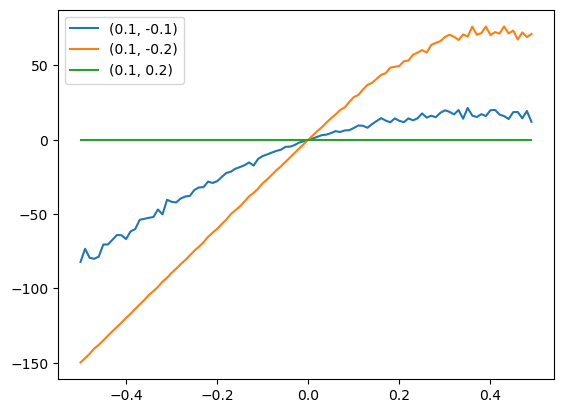

In [10]:
graph = output.groupby('(a1, a2)').agg({
    'v': lambda x: list(x),
    'regret': lambda x: list(x),
    'variance': lambda x: list(x)
}).reset_index()

for each in graph.index:
    plt.plot(graph.loc[each]['v'], graph.loc[each]['regret'], label=graph.loc[each]['(a1, a2)'])
plt.legend()

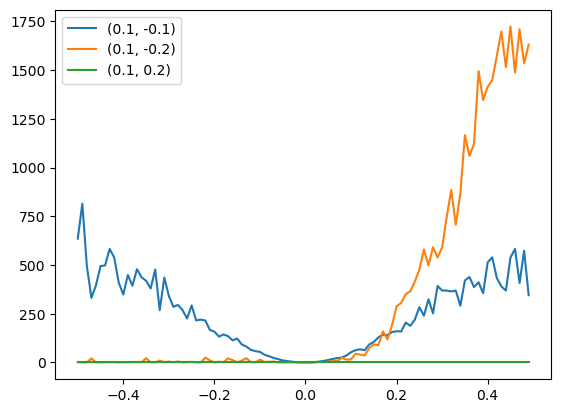

In [11]:
for each in graph.index:
    plt.plot(graph.loc[each]['v'], graph.loc[each]['variance'], label=graph.loc[each]['(a1, a2)'])
plt.legend()